In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.float64)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 0)

In [14]:
unique_elements,count_elements = np.unique(y,return_counts = True)

In [9]:
print(unique_elements)

[0. 1.]


In [10]:
print(count_elements)

[100  50]


In [15]:
for train_index,test_index in splitter.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]


In [16]:
unique_elements,count_elements = np.unique(y_train,return_counts = True)

In [18]:
count_elements/sum(count_elements)

array([0.66666667, 0.33333333])

In [19]:
svm_clf = Pipeline([('scaler',StandardScaler()),
                   ('linear_svc',LinearSVC(C = 1, loss = 'hinge'))])
svm_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [20]:
y_pred = svm_clf.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,y_pred)

array([[19,  1],
       [ 1,  9]], dtype=int64)

The Linear SVC class used here regularizes the bias term, hence it is always important to center the training set first by substracting it's mean. This is already done by Standard Scaler.

<h3>Nonlinear SVM Classification</h3>

As datasets are rarely linearly separable, linear SVM class is not always applicable.
Instead it is better to add more features, such as polynomial features. 

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

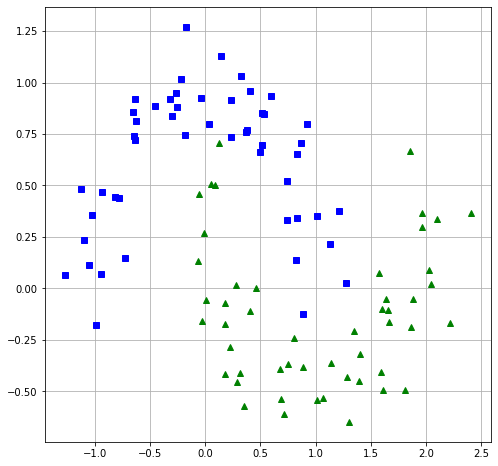

In [5]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.grid()


The above dataset is impossible to be linearly classified, hence it is required that we change the dimension of this by adding in a polynomial

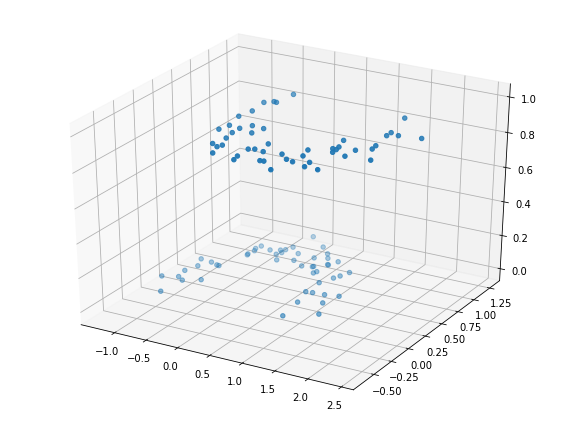

In [10]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection='3d') 
#ax.plot3D(X[:,0],X[:,1],y,'gray')
ax.scatter3D(X[:,0],X[:,1],y,cmap = 'viridis')


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('polyfeatures',PolynomialFeatures(degree=3)),
     ('scaler',StandardScaler()),
     ('svm_clf',LinearSVC(C=10,loss = 'hinge'))
])

In [35]:
polynomial_svm_clf.fit(X,y)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [15]:
dir(polynomial_svm_clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_pairwise',
 '_replace_estimator',
 '_required_parameters',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'memory',
 'named_steps',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'steps',
 'transform',
 've

In [16]:
polynomial_svm_clf.get_params()

{'memory': None,
 'steps': [('polyfeatures',
   PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                      order='C')),
  ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
             penalty='l2', random_state=None, tol=0.0001, verbose=0))],
 'verbose': False,
 'polyfeatures': PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                    order='C'),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svm_clf': LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
           penalty='l2', random_state=None, tol=0.0001, verbose=0),
 'polyfeatures__degree': 3,
 'polyfeatures__include_bias': True,
 'polyfeatures__interaction_only': Fals

In [18]:
polynomial_svm_clf.get_params()['svm_clf'].coef_

array([[ 0.        , -0.47838495, -0.13076692, -5.01370584, -1.52623459,
         0.58114134,  6.63207117,  0.09194729,  1.39149769, -2.84165364]])

In [20]:
scaler_plot = StandardScaler()
X_scaled = scaler_plot.fit_transform(X)
X_scaled

array([[ 1.2288319 , -1.45680539],
       [-0.46341168,  0.5158751 ],
       [ 0.26652612, -1.21498185],
       [-1.78655886, -0.01424789],
       [-1.37234475, -0.193244  ],
       [-1.29483672,  1.21475044],
       [-0.30969263,  0.97191709],
       [ 0.98515796, -1.3765251 ],
       [ 0.40462952,  0.92037829],
       [ 0.41735682, -0.7344115 ],
       [-0.1387788 ,  1.04134997],
       [-0.92160698,  1.3422951 ],
       [ 0.87924151, -1.76986871],
       [-1.26906087,  1.33690337],
       [ 1.62319751,  0.10601539],
       [ 0.78122265,  0.26387389],
       [ 0.70266053, -1.19868072],
       [ 0.62278892, -1.54291373],
       [-0.01243448,  0.82690336],
       [-0.85231282,  1.26601374],
       [-0.63553453, -0.22415248],
       [ 1.51333936, -0.85331953],
       [-0.52823928,  1.09901505],
       [-1.7085747 ,  0.22557657],
       [-0.05445585, -0.47747725],
       [-0.11049293,  1.41352991],
       [-1.60473273,  0.44469157],
       [ 1.68733848, -0.30511962],
       [ 0.25705094,

In [21]:
poly3 = PolynomialFeatures(degree = 3)
Xpoly = poly3.fit_transform(X_scaled)
Xpoly

array([[ 1.00000000e+00,  1.22883190e+00, -1.45680539e+00,
         1.51002785e+00, -1.79016894e+00,  2.12228194e+00,
         1.85557040e+00, -2.19981671e+00,  2.60792776e+00,
        -3.09175178e+00],
       [ 1.00000000e+00, -4.63411675e-01,  5.15875098e-01,
         2.14750381e-01, -2.39062543e-01,  2.66127116e-01,
        -9.95178337e-02,  1.10784374e-01, -1.23326413e-01,
         1.37288352e-01],
       [ 1.00000000e+00,  2.66526124e-01, -1.21498185e+00,
         7.10361748e-02, -3.23824404e-01,  1.47618090e+00,
         1.89329964e-02, -8.63076633e-02,  3.93440774e-01,
        -1.79353301e+00],
       [ 1.00000000e+00, -1.78655886e+00, -1.42478945e-02,
         3.19179257e+00,  2.54547022e-02,  2.03002498e-04,
        -5.70232529e+00, -4.54763238e-02, -3.62675912e-04,
        -2.89235819e-06],
       [ 1.00000000e+00, -1.37234475e+00, -1.93243996e-01,
         1.88333012e+00,  2.65197384e-01,  3.73432420e-02,
        -2.58457822e+00, -3.63942239e-01, -5.12478023e-02,
        -7.

In [22]:
svm_clf_plot = LinearSVC(C = 10,loss = 'hinge')
svm_clf_plot.fit(Xpoly,y)

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [24]:
svm_clf_plot.predict(Xpoly)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [25]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [36]:
#plot the prediction contours
axes_limits = [-1.5,2.5,-1,1.5]
x0s = np.linspace(axes_limits[0],axes_limits[1],100)
x1s = np.linspace(axes_limits[2],axes_limits[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X = np.c_[x0.ravel(),x1.ravel()]
y_pred = polynomial_svm_clf.predict(X).reshape(x0.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [40]:
ydecision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)

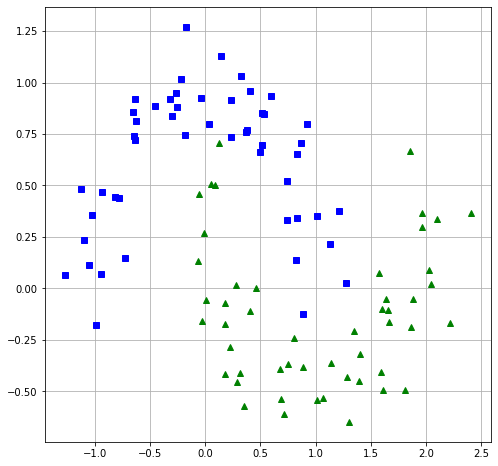

In [44]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.grid()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('polyfeatures',PolynomialFeatures(degree=3)),
     ('scaler',StandardScaler()),
     ('svm_clf',LinearSVC(C=10,loss = 'hinge'))
])
polynomial_svm_clf.fit(X,y)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [46]:
axes_limits = [-1.5,2.5,-1,1.5]
x0s = np.linspace(axes_limits[0],axes_limits[1],100)
x1s = np.linspace(axes_limits[2],axes_limits[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X = np.c_[x0.ravel(),x1.ravel()]
y_pred = polynomial_svm_clf.predict(X).reshape(x0.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [47]:
ydecision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)

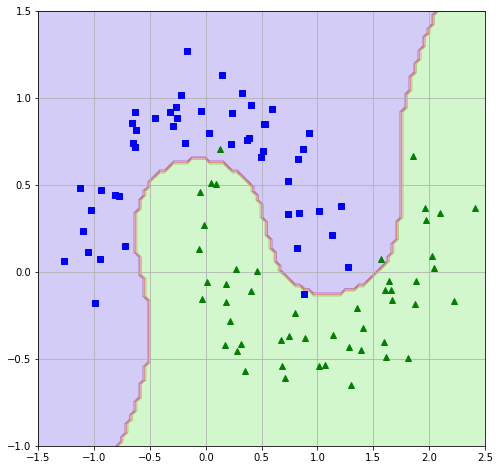

In [48]:
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

idx_1 = np.where(y == 1)[0]
idx_0 = np.where(y == 0)[0]

fig,ax = plt.subplots(1,1,figsize = (8,8))
ax.plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax.plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax.contourf(x0,x1,y_pred,cmap = plt.cm.brg,alpha = 0.2)
ax.grid()
#the boundary line is the line where wx + b = 0

<IPython.core.display.Javascript object>


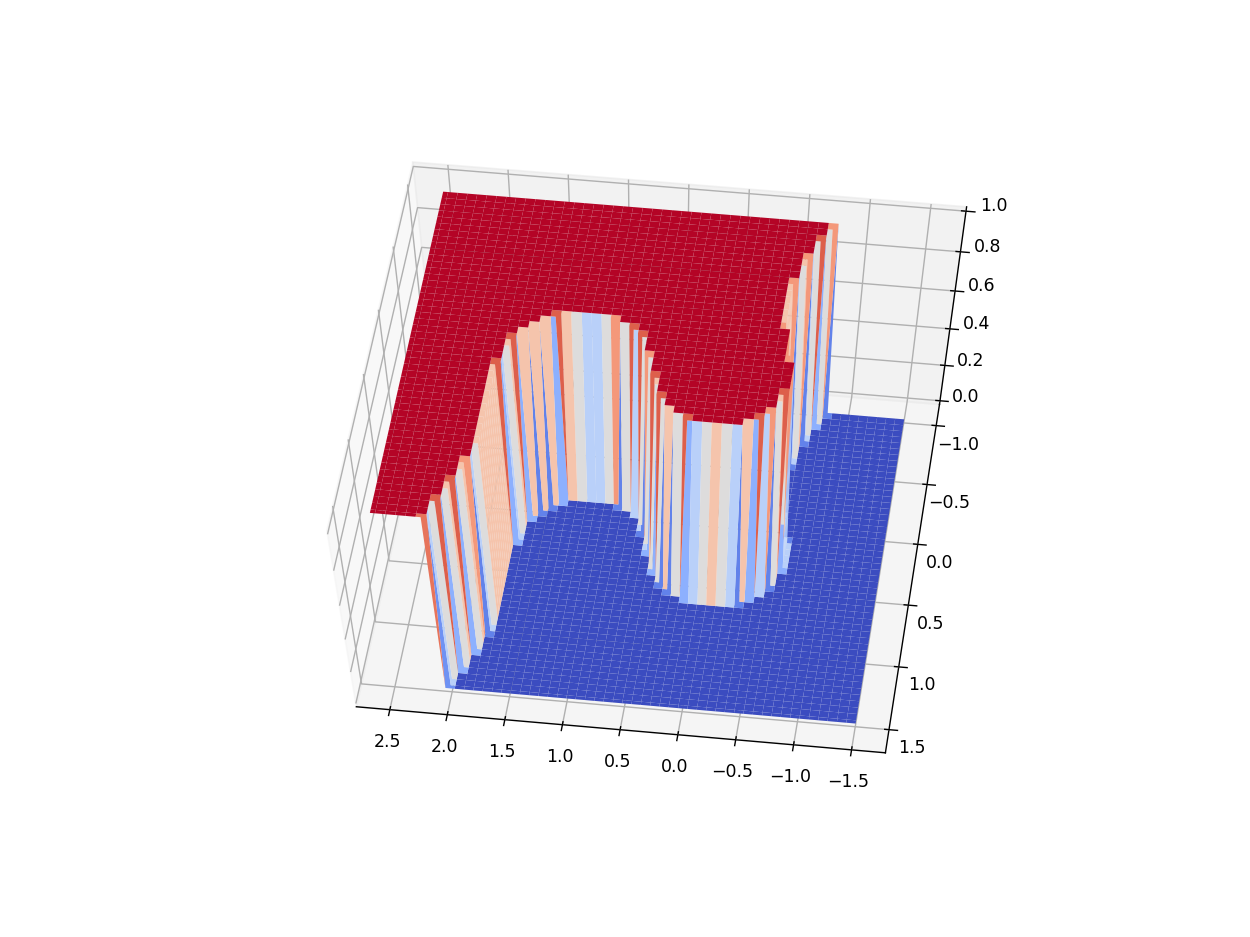

In [53]:
%matplotlib notebook
import matplotlib as mpl
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection='3d')

ax.plot_surface(x0,x1,y_pred,cmap=mpl.cm.coolwarm)
plt.show()

In [82]:
from sklearn.svm import SVC
X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm-clf',SVC(kernel = 'poly',degree= 3, coef0 = 1, C= 5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm-clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [83]:
xaxislims = [-1.5,2.5,-1,1.5]
x0s = np.linspace(xaxislims[0],xaxislims[1],100)
x1s = np.linspace(xaxislims[2],xaxislims[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X_samples = np.c_[x0.ravel(),x1.ravel()]
y_predicted = poly_kernel_svm_clf.predict(X_samples).reshape(x0.shape)
y_predicted

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [84]:


poly_kernel_svm_clf_10 = Pipeline([
    ('scaler',StandardScaler()),
    ('svm-clf',SVC(kernel = 'poly',degree= 10, coef0 = 1, C= 5))
])

poly_kernel_svm_clf_10.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm-clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [85]:
xaxislims = [-1.5,2.5,-1,1.5]
x0s = np.linspace(xaxislims[0],xaxislims[1],100)
x1s = np.linspace(xaxislims[2],xaxislims[3],100)
x0,x1 = np.meshgrid(x0s,x1s)
X_samples = np.c_[x0.ravel(),x1.ravel()]
y_predicted_10 = poly_kernel_svm_clf_10.predict(X_samples).reshape(x0.shape)
y_predicted_10

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

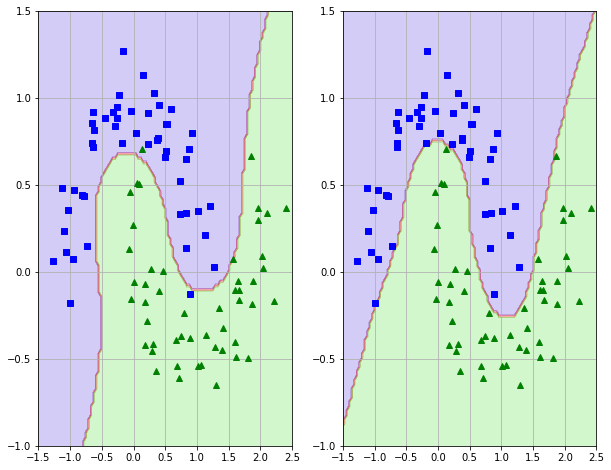

In [88]:
%matplotlib inline
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]
fig,ax = plt.subplots(1,2,figsize = (10,8))
ax[0].plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax[0].plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax[1].plot(X[:,0][idx_0],X[:,1][idx_0],'bs')
ax[1].plot(X[:,0][idx_1],X[:,1][idx_1],'g^')
ax[0].contourf(x0,x1,y_predicted,cmap = plt.cm.brg,alpha = 0.2)
ax[1].contourf(x0,x1,y_predicted_10,cmap = plt.cm.brg,alpha = 0.2)
ax[0].grid()
ax[1].grid()